In [1]:
# --- Smart Lead AI: Data Prep & EDA ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/lead_data.csv')

# --- Initial Inspection ---
# Display the first 5 rows
print("--- First 5 Rows ---")
print(df.head())

# Get a summary of the dataframe (data types, non-null counts)
print("\n--- Dataframe Info ---")
df.info()

--- First 5 Rows ---
                                lead_id     lead_source country  \
0  75f3d1c5-3915-407f-ba59-f33d993706ed       Instagram      UK   
1  1cfc1030-ff1c-43b7-a01c-f9b30cbea1c9        Referral      UK   
2  8ac309fa-b017-492e-b1e0-b90a827e1250  Email Campaign   India   
3  5c6bd21e-4df0-49ea-8b6a-075e4473b494        Referral  Canada   
4  80bf7f7c-8786-4e37-80f7-34211ad7959c        Facebook      UK   

   pages_visited  time_on_site  email_opens  interaction_score  \
0             13         10.09            6                 90   
1              2         18.55            9                 17   
2             15         29.43            6                 84   
3             13         19.82            9                 96   
4             14          1.84            7                 59   

   profile_complete  previous_purchases  converted  
0                52                   1          1  
1                77                   1          1  
2                56 

In [2]:
# --- 2. Preprocessing ---

# We don't need lead_id for prediction, it's just an identifier
df_processed = df.drop('lead_id', axis=1)

# --- One-Hot Encoding ---
# Convert categorical text columns into numerical ones
# This is our preprocessing step
df_processed = pd.get_dummies(df_processed, columns=['lead_source', 'country'], drop_first=True)

# Display the new processed data
print("--- Processed Data (First 5 Rows) ---")
print(df_processed.head())

print("\n--- New Dataframe Info ---")
df_processed.info()

--- Processed Data (First 5 Rows) ---
   pages_visited  time_on_site  email_opens  interaction_score  \
0             13         10.09            6                 90   
1              2         18.55            9                 17   
2             15         29.43            6                 84   
3             13         19.82            9                 96   
4             14          1.84            7                 59   

   profile_complete  previous_purchases  converted  lead_source_Facebook  \
0                52                   1          1                 False   
1                77                   1          1                 False   
2                56                   0          1                 False   
3                93                   1          1                 False   
4                82                   1          1                  True   

   lead_source_Google Ads  lead_source_Instagram  lead_source_LinkedIn  \
0                   False         

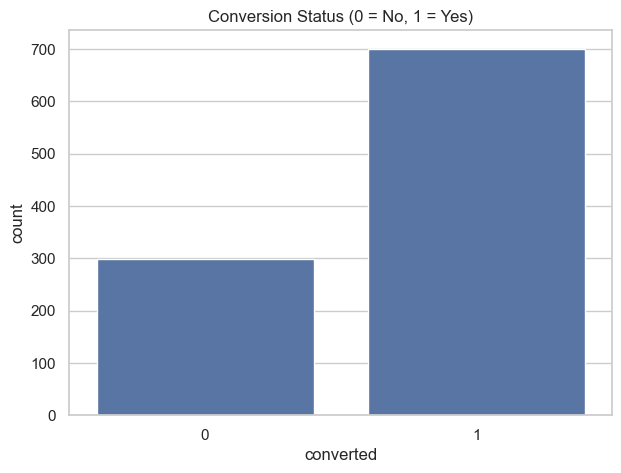

In [3]:
# --- 3. Exploratory Data Analysis (EDA) ---

# Set a nice style for our plots
sns.set_theme(style="whitegrid")

# --- Q1: How many leads converted vs. not? (Target Variable Distribution) ---

plt.figure(figsize=(7, 5))
sns.countplot(data=df_processed, x='converted')
plt.title('Conversion Status (0 = No, 1 = Yes)')
plt.show()

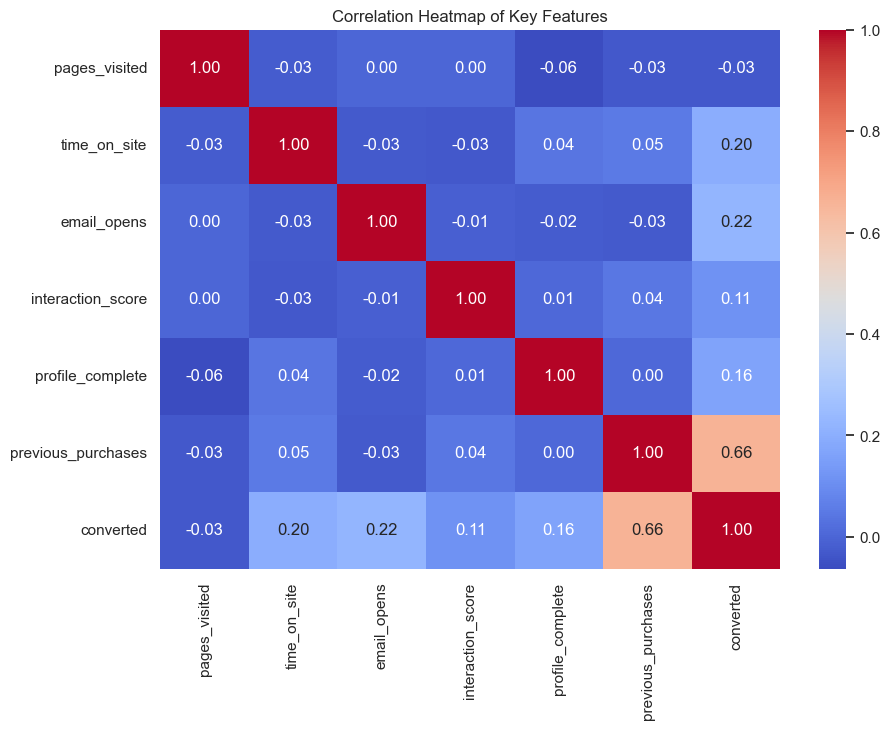

In [4]:
# --- Q2: Which features correlate most with conversion? ---

# Let's select just the original numerical features + our target
numeric_features = [
    'pages_visited', 'time_on_site', 'email_opens', 
    'interaction_score', 'profile_complete', 'previous_purchases', 'converted'
]

# Calculate the correlation matrix
corr_matrix = df_processed[numeric_features].corr()

# Draw the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Key Features')
plt.show()

In [5]:
# --- 4. Save the Processed Data ---

# We'll save this clean data to a new file.
# This is our final deliverable for Module 2.
df_processed.to_csv('../data/lead_data_processed.csv', index=False)

print("Processed data saved to 'data/lead_data_processed.csv'")

Processed data saved to 'data/lead_data_processed.csv'
